<a href="https://colab.research.google.com/github/nlahri/Energy_Consumption_Prediction/blob/main/Appendex_2_Forecasting_Sales_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What I tried to do, challenges faced and alternative path**

In an attempt to forecast demand for a top-selling product based on transaction data, I encountered significant challenges stemming from the dataset's inadequacy. The lack of sufficient data hindered my ability to develop a robust predictive model.

Initial Chosen Data Set: https://archive.ics.uci.edu/dataset/502/online+retail+ii

To overcome this hurdle, I pivoted my focus to a more suitable dataset: the Power Consumption of Tétouan City from the UCI Machine Learning Repository. This dataset provided a more manageable and aggregated approach to understanding energy demands.

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data_path="/content/drive/MyDrive/DSBA 6211_KZK/Online Retail.csv"
df=pd.read_csv(data_path)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
# Assuming df is already loaded

# Remove rows where StockCode contains specified values
filtered_df = df[~df['StockCode'].isin(['POST', 'D', 'C2', 'M', 'post', 'Amazon Fee', 'S', 'DOT', 'CRUK', 'BANK CHARGES', 'B', 'AMAZONFEE'])]

# Remove rows where Quantity is less than 0
filtered_df = filtered_df[filtered_df['Quantity'] >= 0]

# Assign the filtered DataFrame to updated_df
updated_df = filtered_df.copy()

# Display the first few rows of the updated DataFrame
print(updated_df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [28]:
# Select the specified columns
selected_columns = ['StockCode', 'UnitPrice', 'Quantity', 'CustomerID', 'InvoiceDate']
updated_df_selected = updated_df[selected_columns]

# Create the new column 'total_price'
updated_df_selected['total_price'] = updated_df_selected['Quantity'] * updated_df_selected['UnitPrice']

# Display the updated DataFrame
print(updated_df_selected.head())


  StockCode  UnitPrice  Quantity  CustomerID     InvoiceDate  total_price
0    85123A       2.55         6     17850.0  12/1/2010 8:26        15.30
1     71053       3.39         6     17850.0  12/1/2010 8:26        20.34
2    84406B       2.75         8     17850.0  12/1/2010 8:26        22.00
3    84029G       3.39         6     17850.0  12/1/2010 8:26        20.34
4    84029E       3.39         6     17850.0  12/1/2010 8:26        20.34


<ipython-input-28-3dd7c4834157>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Exploring top stock code and Revenue impact

The percentage of the total price of the top 10 stock codes is: 9.43%


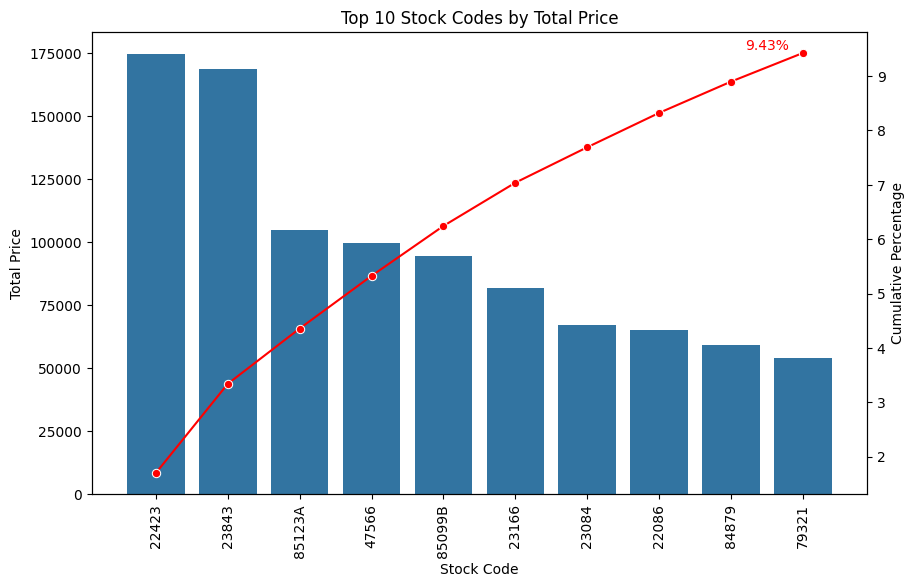

The number of distinct stock codes is: 3933


In [29]:


# Aggregate data by StockCode
agg_df = updated_df_selected.groupby('StockCode')['total_price'].sum().reset_index()

# Sort data by total_price in descending order
agg_df = agg_df.sort_values(by='total_price', ascending=False).reset_index(drop=True)

# Calculate cumulative sum and cumulative percentage
agg_df['cum_sum'] = agg_df['total_price'].cumsum()
agg_df['cum_perc'] = 100 * agg_df['cum_sum'] / agg_df['total_price'].sum()

# Calculate the percentage of the total price of the top n stock codes
top_n = 10
total_price_top_n = agg_df.loc[:top_n - 1, 'total_price'].sum()
total_price_all = agg_df['total_price'].sum()
percentage_top_n = 100 * total_price_top_n / total_price_all

# Display the results
print(f"The percentage of the total price of the top {top_n} stock codes is: {percentage_top_n:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='total_price', data=agg_df.loc[:top_n-1])
plt.xticks(rotation=90)
plt.xlabel('Stock Code')
plt.ylabel('Total Price')
plt.title(f'Top {top_n} Stock Codes by Total Price')

# Adding cumulative percentage line
cum_perc = agg_df.loc[:top_n-1, 'cum_perc']
plt.twinx()
sns.lineplot(x=agg_df.loc[:top_n-1, 'StockCode'], y=cum_perc, color='red', marker="o")
plt.ylabel('Cumulative Percentage')

# Add a label showing the percentage of the total price of the top n stock codes
plt.text(x=top_n - 1.5, y=cum_perc.iloc[-1], s=f'{percentage_top_n:.2f}%', color='red', ha='center', va='bottom')

plt.show()

# Print the number of distinct stock codes
distinct_stock_codes = updated_df_selected['StockCode'].nunique()
print(f'The number of distinct stock codes is: {distinct_stock_codes}')




<ipython-input-30-57468432c46e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-57468432c46e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



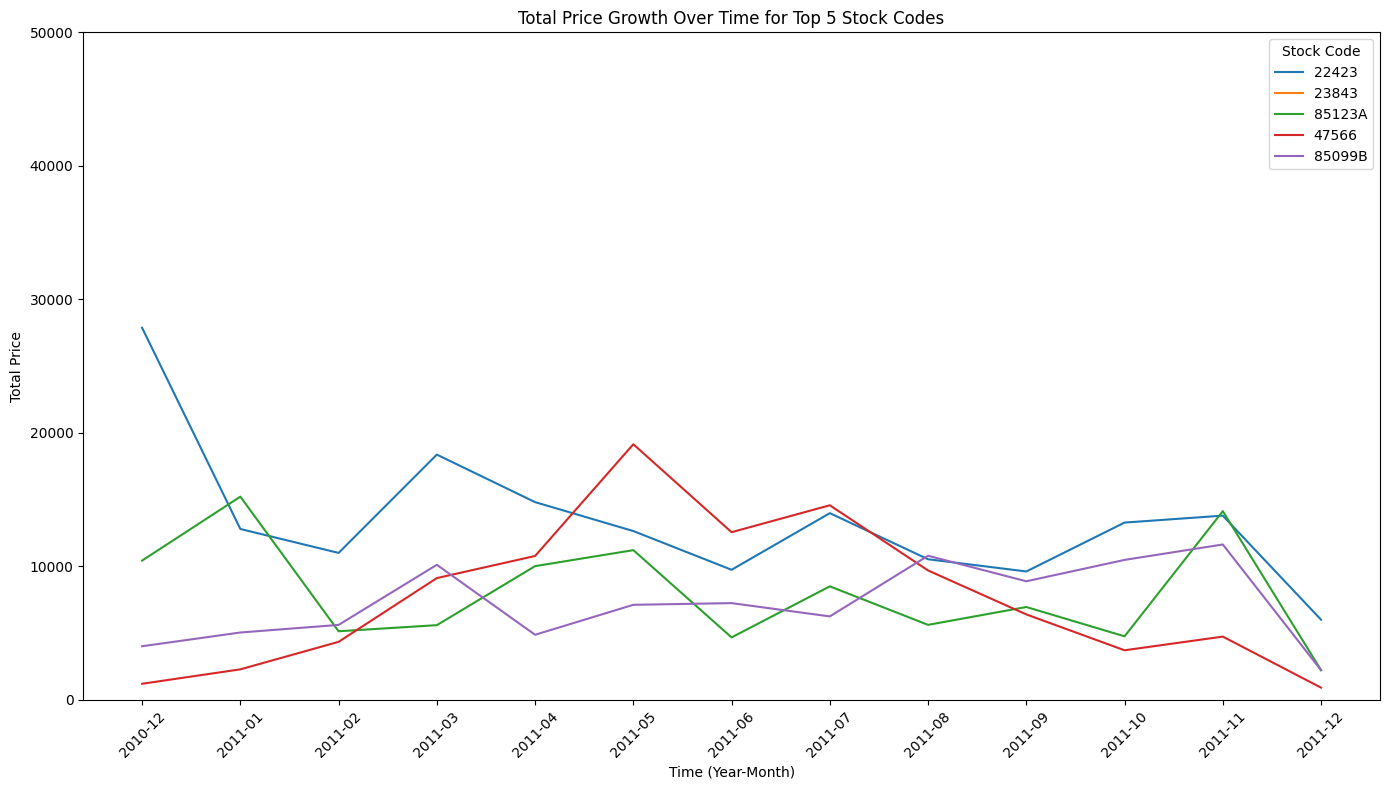

In [30]:


# Ensure InvoiceDate is in datetime format
updated_df_selected['InvoiceDate'] = pd.to_datetime(updated_df_selected['InvoiceDate'])

# Extract year and month for time-series analysis
updated_df_selected['YearMonth'] = updated_df_selected['InvoiceDate'].dt.to_period('M')

# Aggregate data by StockCode and YearMonth for total_price
agg_df_time = updated_df_selected.groupby(['StockCode', 'YearMonth'])['total_price'].sum().reset_index()

# Identify top 5 stock codes with the highest total price growth
total_price_growth = agg_df_time.groupby('StockCode')['total_price'].sum().sort_values(ascending=False).head(5).index

# Filter the data for these top 5 stock codes
top_5_df = agg_df_time[agg_df_time['StockCode'].isin(total_price_growth)]

# Plot the total price growth over time for the top 5 stock codes
plt.figure(figsize=(14, 8))

for stock_code in total_price_growth:
    stock_data = top_5_df[top_5_df['StockCode'] == stock_code]
    plt.plot(stock_data['YearMonth'].astype(str), stock_data['total_price'], label=stock_code)

plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Price')
plt.title('Total Price Growth Over Time for Top 5 Stock Codes')
plt.legend(title='Stock Code')
plt.xticks(rotation=45)
plt.ylim(0, 50000)  # Limiting the y-axis to 50000
plt.tight_layout()
plt.show()


<ipython-input-31-ce13cc0ab1f2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-ce13cc0ab1f2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



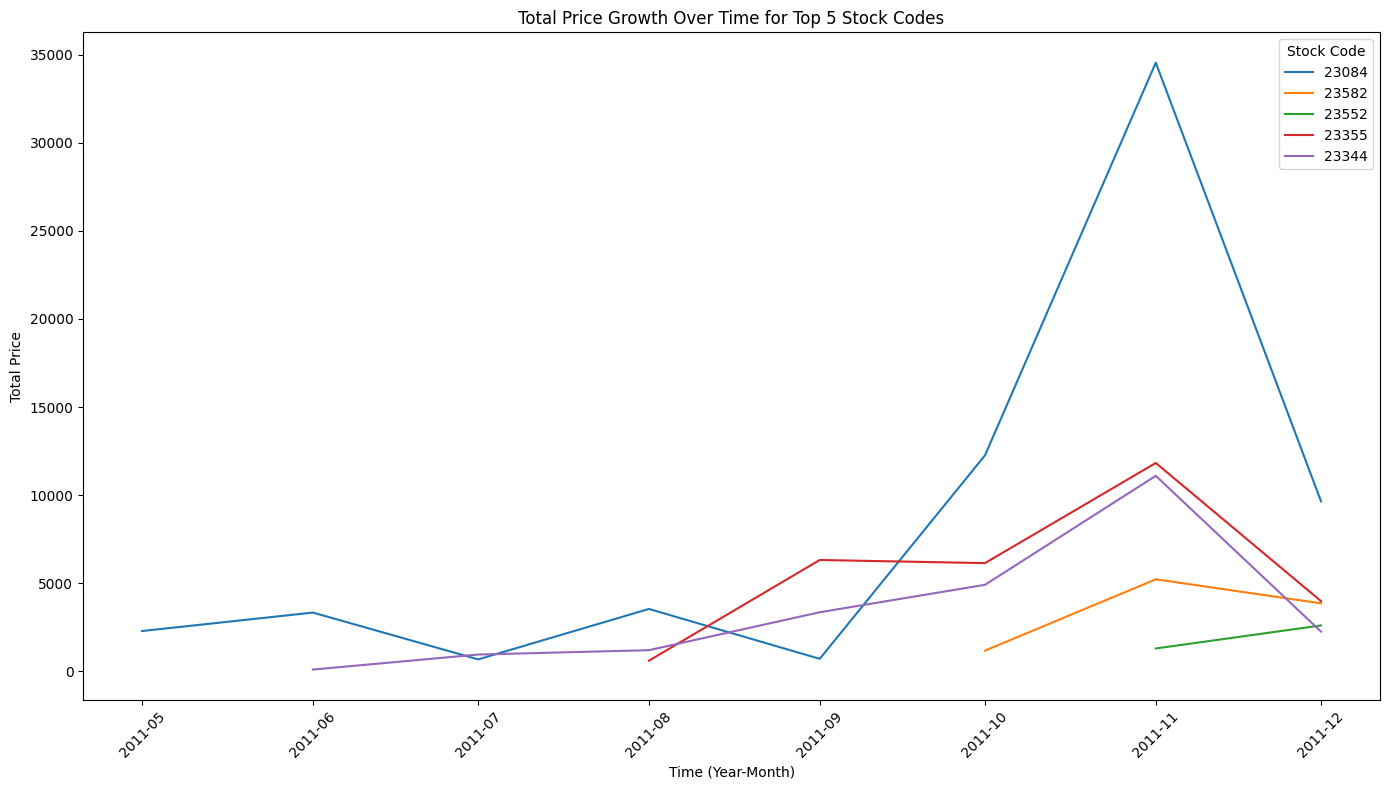

In [31]:
from sklearn.linear_model import LinearRegression

# Ensure InvoiceDate is in datetime format
updated_df_selected['InvoiceDate'] = pd.to_datetime(updated_df_selected['InvoiceDate'])

# Extract year and month for time-series analysis
updated_df_selected['YearMonth'] = updated_df_selected['InvoiceDate'].dt.to_period('M').astype(str)

# Aggregate data by StockCode and YearMonth for total_price
agg_df_time = updated_df_selected.groupby(['StockCode', 'YearMonth'])['total_price'].sum().reset_index()

# Convert YearMonth to datetime for linear regression
agg_df_time['YearMonth'] = pd.to_datetime(agg_df_time['YearMonth'])

# Calculate the slope for each stock code
slopes = {}

for stock_code in agg_df_time['StockCode'].unique():
    stock_data = agg_df_time[agg_df_time['StockCode'] == stock_code]
    stock_data = stock_data.sort_values(by='YearMonth')

    # Convert dates to ordinal for linear regression
    X = stock_data['YearMonth'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y = stock_data['total_price'].values

    if len(X) > 1:  # Ensure there are enough data points for regression
        model = LinearRegression()
        model.fit(X, y)
        slopes[stock_code] = model.coef_[0]

# Select top 5 stock codes with the highest slopes
top_5_stockcodes = sorted(slopes, key=slopes.get, reverse=True)[:5]

# Filter the data for these top 5 stock codes
top_5_df = agg_df_time[agg_df_time['StockCode'].isin(top_5_stockcodes)]

# Plot the total price growth over time for the top 5 stock codes
plt.figure(figsize=(14, 8))

for stock_code in top_5_stockcodes:
    stock_data = top_5_df[top_5_df['StockCode'] == stock_code]
    plt.plot(stock_data['YearMonth'], stock_data['total_price'], label=stock_code)

plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Price')
plt.title('Total Price Growth Over Time for Top 5 Stock Codes')
plt.legend(title='Stock Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Exploring Sales Data per Day

In [32]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming updated_df_selected is already defined and contains the necessary data

# Cap the quantity at 1000
updated_df_selected['Quantity'] = updated_df_selected['Quantity'].clip(upper=10000)

# Identify the top stock code with the highest total price
top_stock_code = updated_df_selected.groupby('StockCode')['total_price'].sum().idxmax()
print(f"Top stock code: {top_stock_code}")

# Filter the DataFrame to include only the top stock code
top_stock_df = updated_df_selected[updated_df_selected['StockCode'] == top_stock_code]

# Convert InvoiceDate to datetime
top_stock_df['InvoiceDate'] = pd.to_datetime(top_stock_df['InvoiceDate'])

# Extract day of the week and hour of the day
top_stock_df['week_day'] = top_stock_df['InvoiceDate'].dt.dayofweek + 1  # Monday=1, Sunday=7
top_stock_df['hour_day'] = top_stock_df['InvoiceDate'].dt.hour

# Boxplot for weekly seasonality with capped quantity
fig_weekly = px.box(
    top_stock_df,
    x='week_day',
    y='Quantity',
    title='Distribution of Quantity for Top Stock Code per Day of Week',
    width=600,
    height=300
)
median_values_weekly = top_stock_df.groupby('week_day')['Quantity'].median()
fig_weekly.add_trace(
    go.Scatter(
        x=median_values_weekly.index,
        y=median_values_weekly.values,
        mode='lines+markers',
        line=dict(color='blue', dash='dash'),
        showlegend=False
    )
)
fig_weekly.update_layout(margin=dict(l=20, r=20, t=35, b=20))
fig_weekly.show()

# Boxplot for daily seasonality with capped quantity
fig_daily = px.box(
    top_stock_df,
    x='hour_day',
    y='Quantity',
    title='Distribution of Quantity for Top Stock Code per Hour of Day',
    width=600,
    height=300
)
median_values_daily = top_stock_df.groupby('hour_day')['Quantity'].median()
fig_daily.add_trace(
    go.Scatter(
        x=median_values_daily.index,
        y=median_values_daily.values,
        mode='lines+markers',
        line=dict(color='blue', dash='dash'),
        showlegend=False
    )
)
fig_daily.update_layout(margin=dict(l=20, r=20, t=35, b=20))
fig_daily.show()


Top stock code: 22423


<ipython-input-32-dfc0d5d024f6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-dfc0d5d024f6>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-dfc0d5d024f6>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-dfc0d

## Test_Train Split and Time aggregation

Top stock code: 22423
Missing data after aggregation:
Quantity    0
dtype: int64
Dates train      : 2010-12-01 12:00:00 --- 2011-07-31 18:00:00  (n=970)
Dates validation : 2011-07-31 00:00:00 --- 2011-10-30 18:00:00  (n=368)
Dates test       : 2011-10-30 00:00:00 --- 2011-12-09 06:00:00  (n=162)


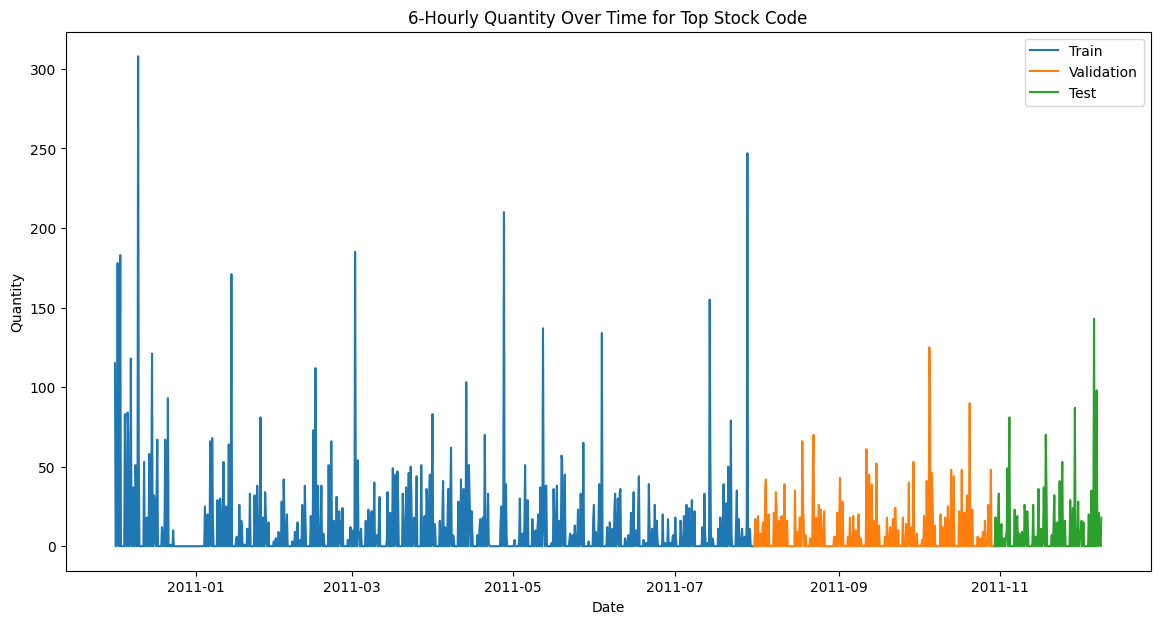

In [33]:
# Assuming updated_df_selected is already loaded

# Step 1: Identify the top stock code with the highest total price
top_stock_code = updated_df_selected.groupby('StockCode')['total_price'].sum().idxmax()
print(f"Top stock code: {top_stock_code}")

# Step 2: Extract the time index and quantity index for this stock code
top_stock_df = updated_df_selected[updated_df_selected['StockCode'] == top_stock_code][['InvoiceDate', 'Quantity']]

# Convert InvoiceDate to datetime
top_stock_df['InvoiceDate'] = pd.to_datetime(top_stock_df['InvoiceDate'])

# Step 3: Sort by InvoiceDate and set InvoiceDate as the index
top_stock_df = top_stock_df.sort_values(by='InvoiceDate').set_index('InvoiceDate')

# Step 4: Aggregate quantity four times a day (6-hour intervals)
top_stock_6h = top_stock_df.resample('6H').sum()

# Check for missing data after aggregation
missing_data = top_stock_6h.isna().sum()
print(f"Missing data after aggregation:\n{missing_data}")

# Step 5: Split the aggregated data into train, validation, and test sets
train_end_date = '2011-07-31'
validation_end_date = '2011-10-30'

data_train = top_stock_6h[:train_end_date]
data_val = top_stock_6h[train_end_date:validation_end_date]
data_test = top_stock_6h[validation_end_date:]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validation : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plot the train, validation, and test sets
plt.figure(figsize=(14, 7))
plt.plot(data_train.index, data_train['Quantity'], label='Train')
plt.plot(data_val.index, data_val['Quantity'], label='Validation')
plt.plot(data_test.index, data_test['Quantity'], label='Test')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('6-Hourly Quantity Over Time for Top Stock Code')
plt.legend()
plt.show()




In [34]:
from sklearn.metrics import mean_absolute_error

def custom_metric(y_true, y_pred):
    """
    Calculate the mean absolute error using only the predicted values
    for weekdays from 9:00 AM to 8:00 PM, excluding sales on Saturday.
    """
    # Extract the day of the week and hour of the day from the index
    day_of_week = y_true.index.day_of_week
    hour_of_day = y_true.index.hour

    # Create a mask for weekdays (Monday=0 to Friday=4 and Sunday=6) and specified hours
    mask = (
        day_of_week.isin([0, 1, 2, 3, 4, 6]) &  # Monday to Friday and Sunday
        (hour_of_day >= 9) & (hour_of_day < 20)  # 9:00 AM to 8:00 PM
    )

    # Calculate mean absolute error only for the selected time period
    metric = mean_absolute_error(y_true[mask], y_pred[mask])

    return metric


In [35]:
top_stock_6h.head()

,Quantity
InvoiceDate,
2010-12-01 12:00:00,115
2010-12-01 18:00:00,0
2010-12-02 00:00:00,0
2010-12-02 06:00:00,5
2010-12-02 12:00:00,178


<Figure size 1200x600 with 0 Axes>

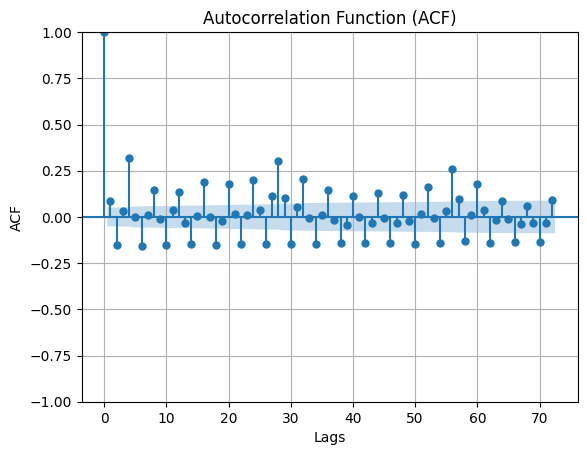

<Figure size 1200x600 with 0 Axes>

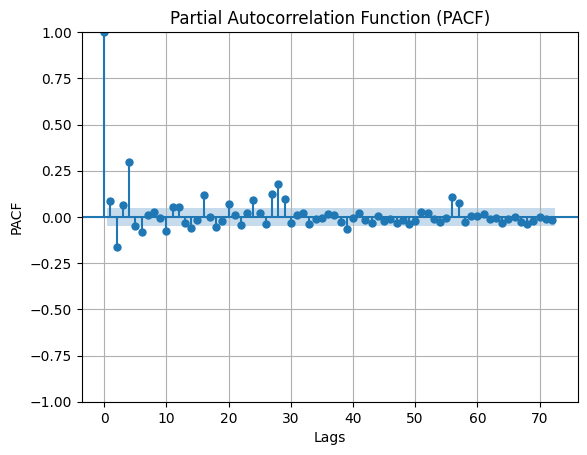

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming top_stock_df is already defined and has a 'InvoiceDate' and 'quantity' column



# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(top_stock_6h['Quantity'], lags=72)  # Use the correct column name for quantity
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid()
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(top_stock_6h['Quantity'], lags=72)  # Use the correct column name for quantity
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid()
plt.show()






In [37]:
top_stock_6h.head()

,Quantity
InvoiceDate,
2010-12-01 12:00:00,115
2010-12-01 18:00:00,0
2010-12-02 00:00:00,0
2010-12-02 06:00:00,5
2010-12-02 12:00:00,178


## Model Fit_ LGBM (Base Model)

In [38]:
!pip install skforecast
import warnings
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


# Create and fit the forecaster
forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(
        learning_rate=0.05,
        max_depth=5,
        n_estimators=100,
        random_state=123
    ),
    lags=12  # Use appropriate lags based on ACF/PACF analysis
)



## Model Backtesting

In [39]:
# Backtesting test period
# ==============================================================================

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = top_stock_6h['Quantity'],
                          initial_train_size = len(top_stock_6h.loc[:validation_end_date]),
                          fixed_train_size   = False,
                          steps              = 36,
                          refit              = False,
                          metric             = custom_metric,
                          verbose            = False, # Change to True to see detailed information,

                )

print(f"Backtest error: {metric}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 1322, number of used features: 12
[LightGBM] [Info] Start training from score 8.928896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

  0%|          | 0/5 [00:00<?, ?it/s]

Backtest error:    custom_metric
0      11.750514


In [40]:
# Assuming `predictions` is the output from your backtesting process
# Set to zero predictions for closed days (Saturdays)
# Assuming `predictions` is the output from your backtesting process
# Set to zero predictions for closed days (Saturdays)
# Use the index of predictions to identify the corresponding day of the week
day_of_week = predictions.index.day_of_week

# Identify closed days (Saturday)
closed_days = day_of_week.isin([5])  # Saturday is represented by 5

# Set predictions to zero for closed days (Saturdays)
predictions[closed_days] = 0






## Test vs Predicted Plot

In [41]:
# Plot predictions vs real value
# ======================================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['Quantity'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Date time",
    yaxis_title="Quantity",
    width  = 800,
    height = 400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()



## MAE & MSE on Baseline Model

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming `data_test` contains the actual quantities and `predictions` contains the predicted quantities
# Ensure both series are of the same length
actual_values = data_test['Quantity'].loc[predictions.index]  # Align the actual values with predictions

# Calculate errors
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)

# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 8.069738848210003
Mean Squared Error (MSE): 298.97916128594215
Root Mean Squared Error (RMSE): 17.291013888316154
